In [56]:
from PIL import Image
import numpy as np
from PIL import ImageChops
from PIL import ImageStat as stat
import matplotlib.pyplot as plt
from random import randint

Ukrywanie informacji w obrazie

In [57]:
im_kod = Image.open('kod.bmp')
print("tryb", im_kod.mode)
print("rozmiar", im_kod.size)
obraz = Image.open('jesien.jpg')
print("tryb", obraz.mode)
print("rozmiar", obraz.size)



tryb L
rozmiar (960, 540)
tryb RGB
rozmiar (960, 540)


In [58]:
def ukryj_kod(obraz, im_kod):
    t_obraz = np.asarray(obraz)
    t_kodowany = t_obraz.copy()
    h, w, d = t_obraz.shape
    t_kod = np.asarray(im_kod)
    for i in range(h):
        for j in range(w):
            if t_kod[i, j] > 0:
                k = randint(0,2)
                t_kodowany[i, j, k] = np.clip(np.int16(t_obraz[i, j, k]) + 1, 0, 255).astype(np.uint8) # rozszerzam typ uint8 żeby móc dodać 1 a potem obciąć do 255
    return Image.fromarray(t_kodowany) 

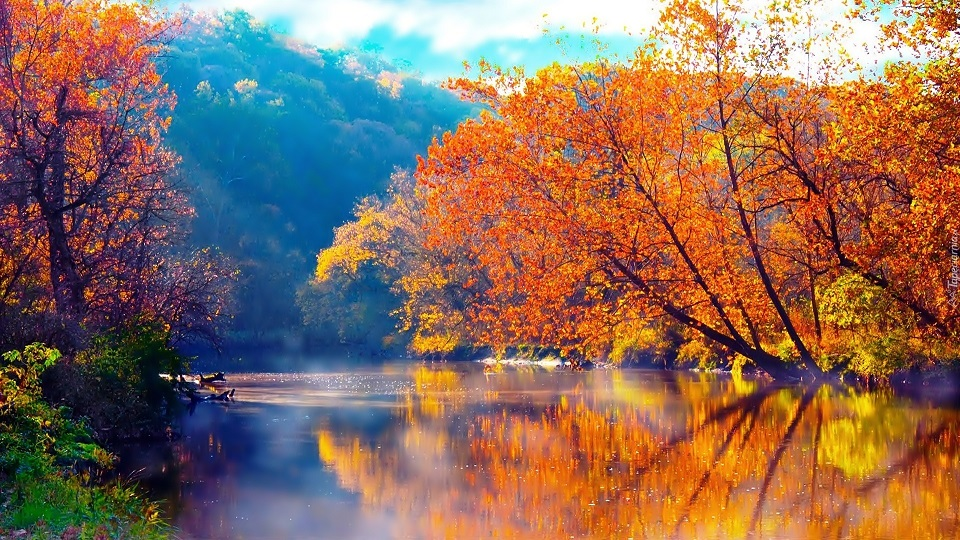

In [59]:
im_kodowany = ukryj_kod(obraz, im_kod)
im_kodowany

Próba odkrycia kodu z użyciem ImageChops.difference (nieskuteczna)

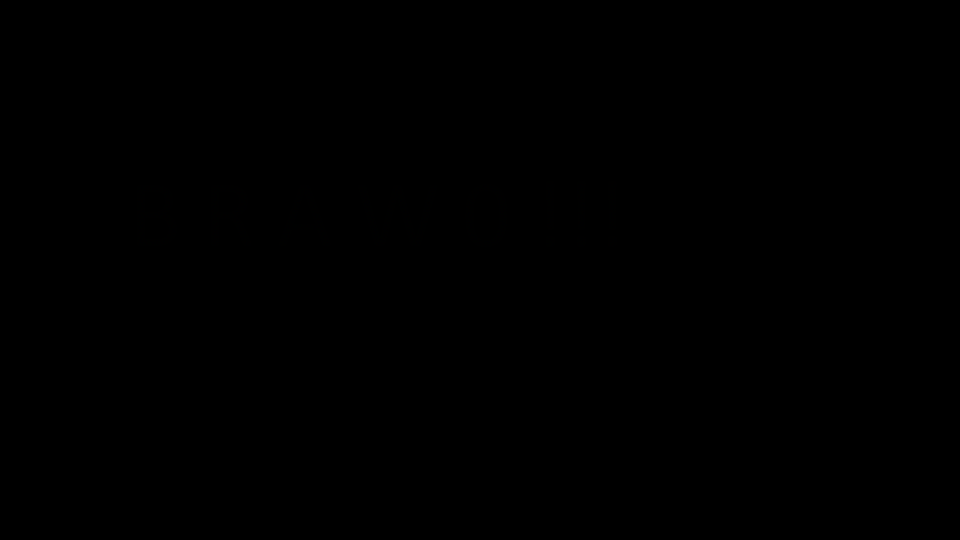

In [60]:
odkodowany = ImageChops.difference(obraz, im_kodowany)
odkodowany